# Linear regression without scikit-learn

## Title: "Predicting Penguin Body Mass: Unraveling the Relationship with Flipper Length using Simple Linear Regression (No scikit-learn Spells)"




## Introduction:
### Linear regression is a widely used statistical technique for modeling the relationship between variables. In this article, we will explore how linear regression can be applied to predict the body mass of penguins based on their flipper length. By understanding the relationship between these two variables, we can gain valuable insights into penguin biology and potentially make predictions about their body mass.

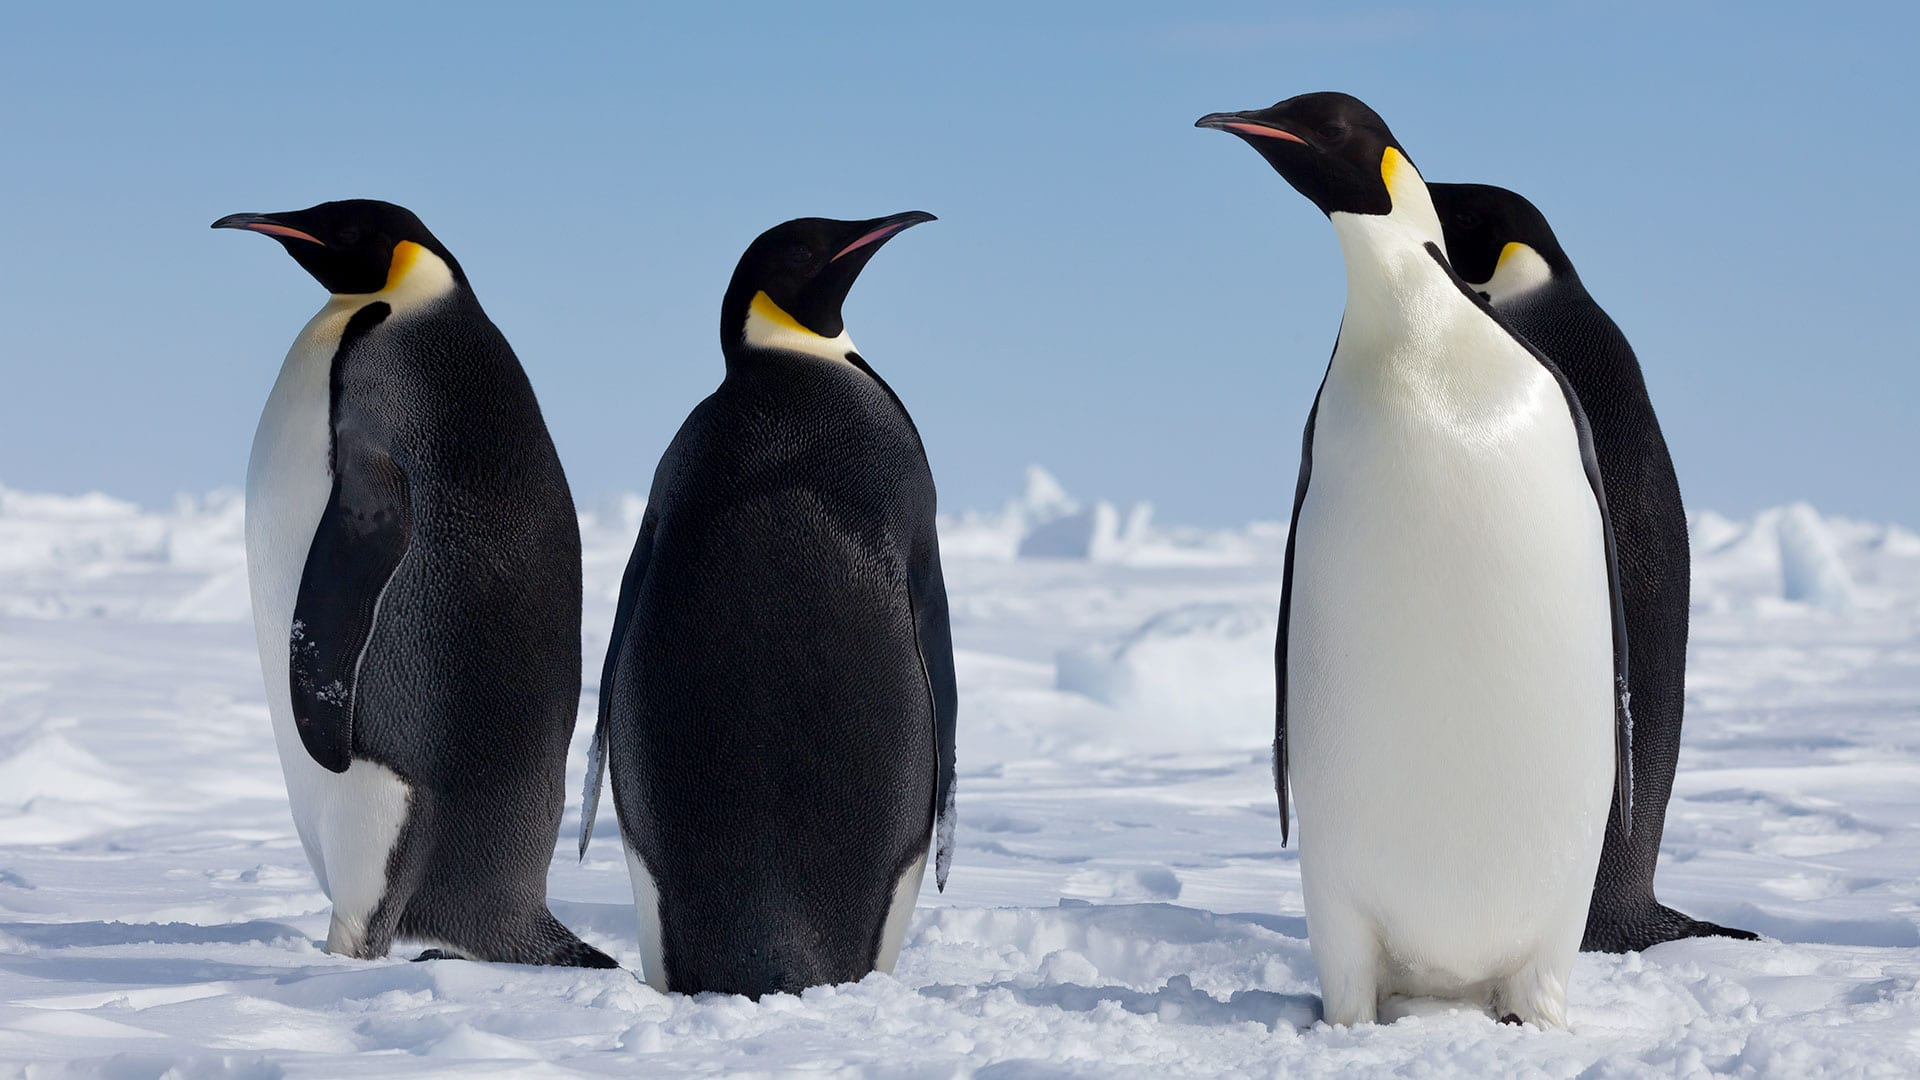

## Data Preparation:
### Before we dive into the regression analysis, we need to prepare our data. We start by importing the necessary libraries, such as Pandas, NumPy, Seaborn, and Matplotlib, and then load the penguin dataset. The dataset contains information about penguins, including their flipper length and body mass. We select the relevant columns, drop any missing values, and perform descriptive analysis to understand the characteristics of our data.

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [111]:
penguins = pd.read_csv("penguin.csv")
penguins.head() 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.0,19.0,181.0,3750.0,MALE
1,Adelie,Torgersen,40.0,17.0,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.0,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,37.0,19.0,193.0,3450.0,FEMALE


In [112]:
penguins.shape

(344, 7)

### Data Cleaning:

In [113]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [114]:
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.0,19.0,181.0,3750.0,MALE
1,Adelie,Torgersen,40.0,17.0,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.0,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,37.0,19.0,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.0,21.0,190.0,3650.0,MALE


In [115]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Statistical Description Of The Data

In [116]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,44.078078,17.240240,200.966967,4207.057057
std,5.465657,1.996066,14.015765,805.215802
min,32.000000,13.000000,172.000000,2700.000000
25%,40.000000,16.000000,190.000000,3550.000000
50%,45.000000,17.000000,197.000000,4050.000000
75%,49.000000,19.000000,213.000000,4775.000000
max,60.000000,22.000000,231.000000,6300.000000


## Exploratory Data Analysis
### Data Visualization:
### Before starting any modeling, it is important to explore the data to gain insights and understand the relationships between variables. This involves examining the distributions of individual responses and predictors using graphical and numerical summaries.


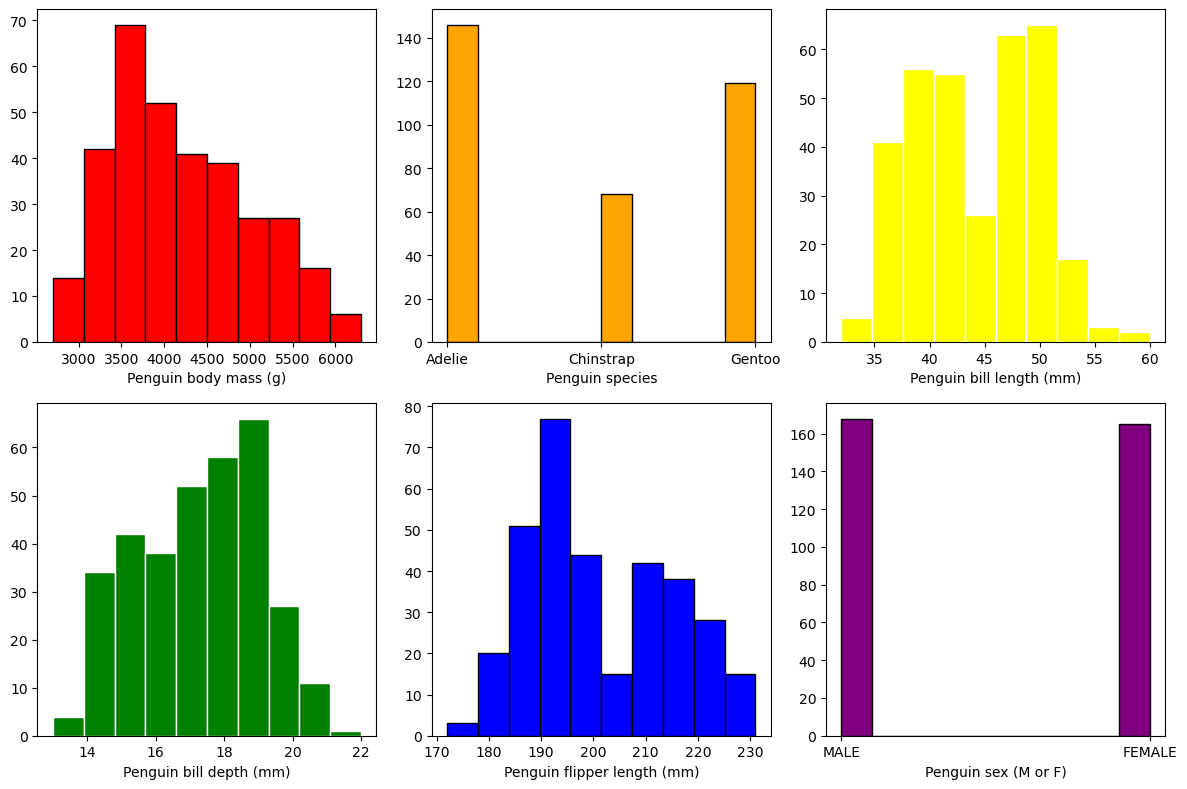

In [117]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Distribution Of The Response variable
axes[0,0].hist(penguins['body_mass_g'], color="red", edgecolor="black")
axes[0,0].set_xlabel("Penguin body mass (g)")

# Distribution Of The Explanatory variables
axes[0,1].hist(penguins['species'], color="orange", edgecolor="black")
axes[0,1].set_xlabel("Penguin species")

axes[0,2].hist(penguins['bill_length_mm'], color = "yellow", edgecolor="white")
axes[0,2].set_xlabel("Penguin bill length (mm)")

axes[1,0].hist(penguins['bill_depth_mm'], color="green", edgecolor="white")
axes[1,0].set_xlabel("Penguin bill depth (mm)")

axes[1,1].hist(penguins['flipper_length_mm'], color='blue', edgecolor='black')
axes[1,1].set_xlabel("Penguin flipper length (mm)")

axes[1,2].hist(penguins['sex'], color='purple', edgecolor='black')
axes[1,2].set_xlabel("Penguin sex (M or F)")

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()



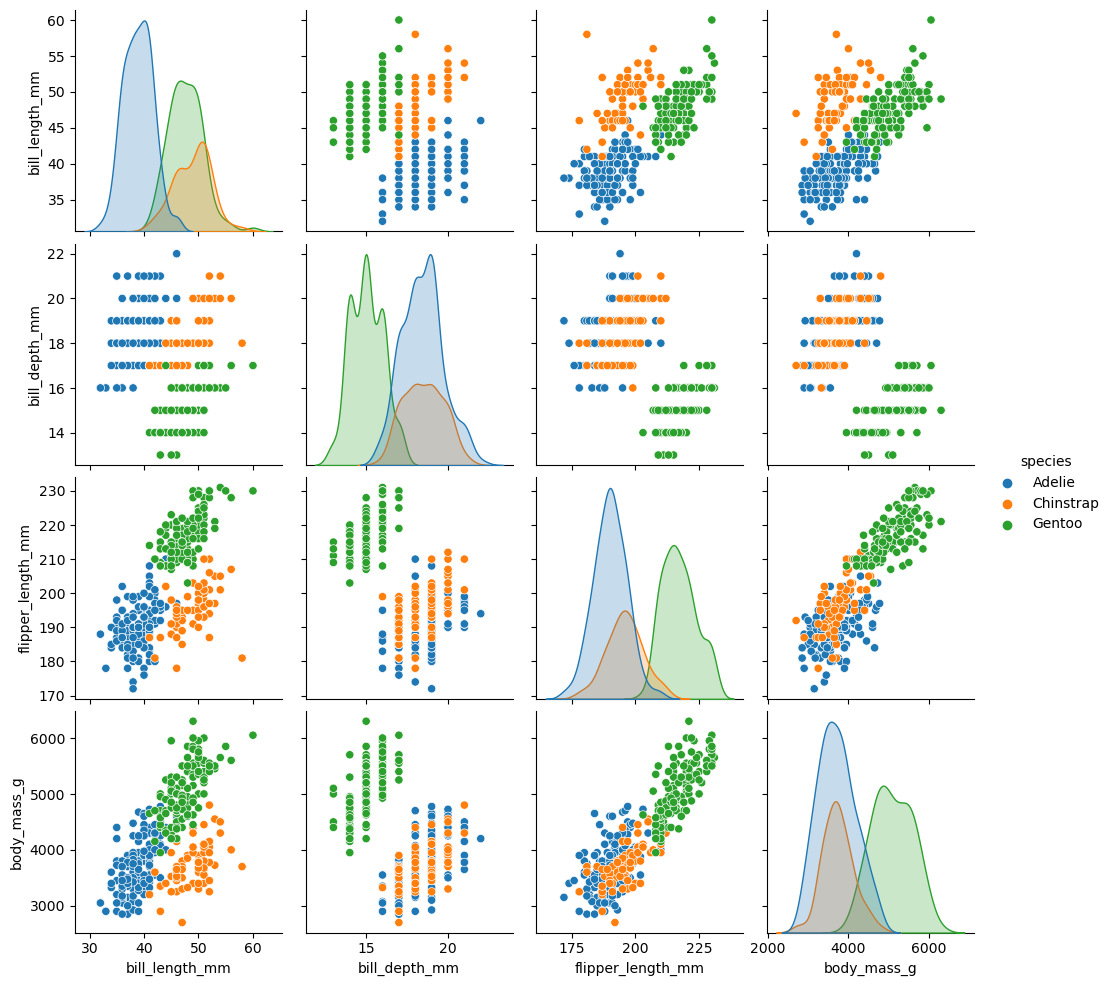

In [118]:
# Select the desired columns from the penguins dataframe
selected_columns = ["species", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "sex", "body_mass_g"]
selected_data = penguins[selected_columns]

# Convert the selected data to a pandas DataFrame
selected_df = pd.DataFrame(selected_data)

# Create the pairplot
sns.pairplot(selected_df, hue="species")

# Display the plot
plt.show()


C:\Users\spand\AppData\Local\Temp\ipykernel_23508\4237514393.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = penguins.corr()


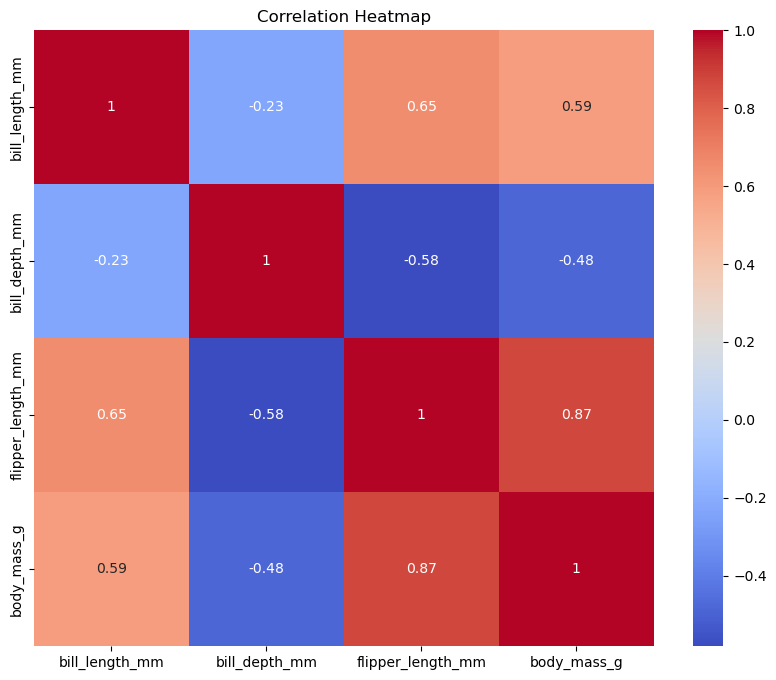

In [119]:
# Calculate the correlation matrix
correlation_matrix = penguins.corr()

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### From this graph, we can see that there is a strong correlation between body mass and bill length, body mass and bill depth, and body mass and flipper length. The strongest correlation is for body mass and flipper length. Hence, will set the feature data as flipper length and target data as body mass.

In [120]:
# Splitting the data into feature data and target data.
x=penguins['flipper_length_mm'].values
y=penguins['body_mass_g'].values

### Scatter Plot Visualization
### To visualize the relationship between flipper length and body mass, we create a scatter plot using Seaborn. The scatter plot helps us visualize the distribution of data points and identify any potential patterns or trends. We plot the flipper length on the x-axis and body mass on the y-axis, using black markers with a slight transparency. This initial plot gives us a visual overview of the data.

### This code demonstrates how to create a scatter plot using the `seaborn` library in Python. The plot visualizes the relationship between two variables, "Flipper Length" and "Body Mass".


Text(0, 0.5, 'Body Mass (g)')

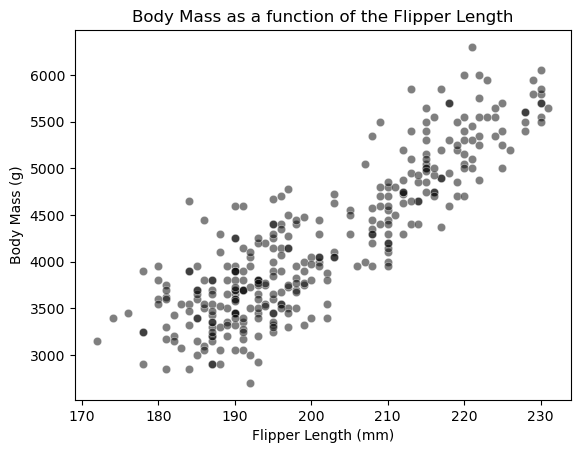

In [121]:
ax = sns.scatterplot(data=penguins, x=x, y=y, color="black", alpha=0.5)
ax.set_title("Body Mass as a function of the Flipper Length")
ax.set_xlabel("Flipper Length (mm)") 
ax.set_ylabel("Body Mass (g)")           

## Line and Scatter Plot Visualization
### This code demonstrates how to create a combined line and scatter plot using the `seaborn` library in Python. The plot visualizes the relationship between two variables, "Flipper Length" and "Body Mass".


Text(0, 0.5, 'Body Mass (g)')

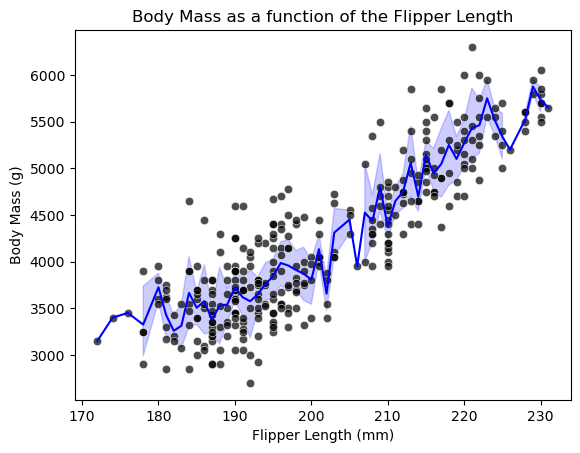

In [122]:
ax = sns.lineplot(data=penguins, x=x, y=y, color="blue")
ax = sns.scatterplot(data=penguins, x=x, y=y, color="black", alpha=.7)
ax.set_title("Body Mass as a function of the Flipper Length")
ax.set_xlabel("Flipper Length (mm)") 
ax.set_ylabel("Body Mass (g)")           

## Calculating the Regression Line:
### Next, we calculate the slope (b1) and intercept (b0) for the regression line. These values define the equation of the line, y = b1 * x + b0, where y represents body mass and x represents flipper length. By calculating these coefficients, we can estimate the body mass of penguins based on their flipper length.
### Calculation of Mean


In [123]:
#mean of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)
mean_x, mean_y

(200.96696696696696, 4207.057057057057)

### Calculation of Regression Line Parameters

#### This code calculates the slope (`b1`) and intercept (`b0`) for a linear regression line.


In [124]:
#finding b1 and b0. 
#b1 is the slope(m) in y=mx+c and b0 is c.
#y = mx+c is equation of regression line.
numerator = 0
denominator = 0
for i in range(len(x)):
    numerator += (x[i] - mean_x) * (y[i] - mean_y)
    denominator += (x[i] - mean_x)**2
    b1=numerator/denominator
    b0=mean_y-b1*mean_x
print(b1, b0)    

50.15326594224109 -5872.092682842817


## Plotting the Linear Regression Line
### Enhancing the Visualization:
###  To further analyze the relationship between flipper length and body mass, we enhance the scatter plot by adding a regression line. This line represents the linear relationship between the two variables. We use Seaborn to plot both the scatter points and the regression line, which is displayed in blue color. This visualization helps us see the overall trend and direction of the relationship.

#### This code plots the scatter plot of the data points and overlays the linear regression line.


In [125]:
X = np.linspace(x.min(), x.max(), num=300)
Y = b1*X+b0


Text(0, 0.5, 'Body Mass (g)')

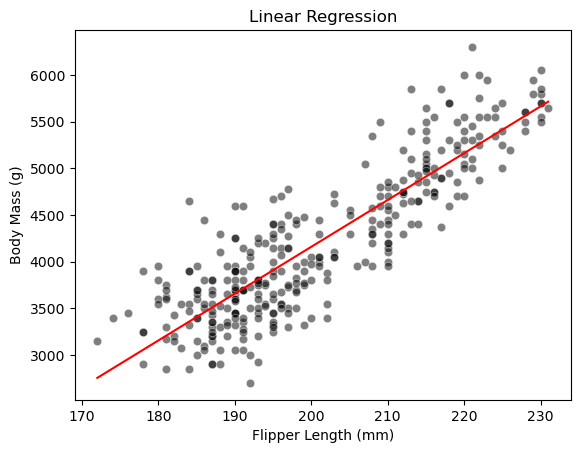

In [126]:
ax = sns.scatterplot(data=penguins, x=x, y=y, color="black", alpha=.5)
ax.plot(X, Y, color="red")
ax.set_title("Linear Regression")
ax.set_xlabel("Flipper Length (mm)") 
ax.set_ylabel("Body Mass (g)")           

## Evaluation with R-squared:
### To evaluate the quality of our regression model, we calculate the coefficient of determination (R-squared). R-squared measures the proportion of the variation in body mass that can be explained by the linear relationship with flipper length. A higher R-squared value indicates a better fit of the model to the data. In our analysis, we find an R-squared value of 75.89 % percent, which is a decent value.

### This code calculates the coefficient of determination (R-squared) for the linear regression model.


In [127]:
ss_t = 0
ss_r = 0
for i in range(len(x)):
    y_pred = b0+b1*x[i]
    ss_t+=(y[i]-mean_y)**2
    ss_r+=(y[i]-y_pred)**2
r2=(1-(ss_r/ss_t))
print(r2*100,"%")    

76.20921573403912 %


## Conclusion:
### Using linear regression, we successfully modeled the relationship between flipper length and body mass in penguins. Our analysis provides insights into the linear association between these variables and allows us to make predictions about penguin body mass based on their flipper length. Understanding such relationships can contribute to our knowledge of penguin biology and aid in further research and conservation efforts.

### In this article, we have showcased a simple example of linear regression applied to penguin data. Linear regression is a versatile technique that can be used in various fields to uncover relationships and make predictions. By mastering this fundamental statistical method, researchers and data analysts can gain valuable insights and make informed decisions.

### I hope you found this reading blog informative and enjoyable. Happy penguin analysis!




